In [21]:
#Spam Classification using CNN - Convolutional Neural Network

In [22]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , GlobalMaxPool1D
from tensorflow.keras.layers import Conv1D,MaxPooling1D , Embedding
from tensorflow.keras.models import Model

In [26]:
df = pd.read_csv('spam.csv' , encoding = 'ISO-8859-1')

In [27]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"] , axis=1)

In [29]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df.columns = ['labels' , 'data']

In [31]:
df['b_labels'] = df['labels'].map({'ham':0,'spam' :1})
y = df['b_labels'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [33]:
#Spllitting Training data and Testing data
x_train , x_test , y_train , y_test = train_test_split(df['data'] , y , test_size=0.33)

In [34]:
#Converting Sentences to sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [35]:
#Check word index Mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print("Unique token count : %s" % V)

Unique token count : 7204


In [40]:
#Pad Sequences ( to get N * T matrix)
data_train = pad_sequences(sequences_train)
print(data_train.shape)

(3733, 162)


In [41]:
T = data_train.shape[1]
print(T)

162


In [42]:
data_test = pad_sequences(sequences_test , maxlen=T)
#maxlen to truncate longer sentences in test set
print(data_test.shape)

(1839, 162)


Model Building

In [43]:
# Emdedding Dimensionality
D = 20 # Vector Size

# Input Layer
i = Input(shape=(T,)) # input layer takes in sequence of integers , so shape is T

# Embedding Layer
x = Embedding(V + 1 , D)(i) # Takes seq of integers and returns seq of word vectors . N * T * D array . Indexing starts from 1, so embedding size = (V+1) * D

# First CNN Layer
x = Conv1D(32 , 3 , activation='relu')(x)
x = MaxPooling1D(3)(x)

# Second CNN Layer
x = Conv1D(64 , 3 , activation='relu')(x)
x = MaxPooling1D(3)(x)

# Third CNN Layer
#First CNN Layer
x = Conv1D(128 , 3 , activation='relu')(x)
x = GlobalMaxPool1D()(x)

# Dense Layer
x = Dense(1, activation='sigmoid')(x) # sigmoid because of binary classification

model = Model(i, x)


In [44]:
# Compile the Model
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [45]:
#Train the Model
r = model.fit(x=data_train , y=y_train , epochs=5 , validation_data=(data_test,y_test)) 

Epoch 1/5
117/117 [==============================] - 3s 8ms/step - loss: 0.3907 - accuracy: 0.8588 - val_loss: 0.2643 - val_accuracy: 0.8717
Epoch 2/5
117/117 [==============================] - 1s 7ms/step - loss: 0.1199 - accuracy: 0.9494 - val_loss: 0.0712 - val_accuracy: 0.9821
Epoch 3/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0154 - accuracy: 0.9946 - val_loss: 0.0588 - val_accuracy: 0.9831
Epoch 4/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0711 - val_accuracy: 0.9842
Epoch 5/5
117/117 [==============================] - 1s 7ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0732 - val_accuracy: 0.9848


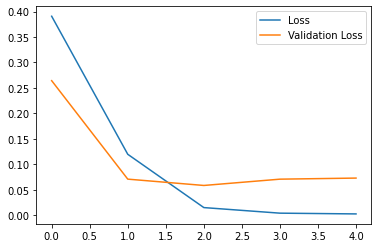

In [50]:
# Loss per iteration 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'Loss')
plt.plot(r.history['val_loss'],label = 'Validation Loss')
plt.legend()
plt.show()


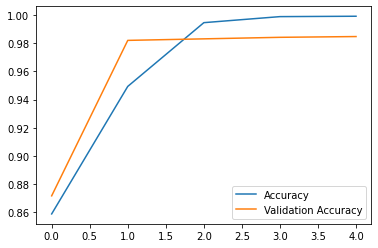

In [49]:
# Accuracy per Iteration
plt.plot(r.history['accuracy'] , label = 'Accuracy')
plt.plot(r.history['val_accuracy'] , label = 'Validation Accuracy')
plt.legend()
plt.show()
